# TP Final : Panique à Poudlard !

 **_IMPORTANT :_** Dans le cadre de ce TP, chacun de vous à un jeu de données différent. Je vous indique donc à consulter cette liste : ..., afin de récupérer votre **NUM**, et ainsi récupérer votre bon jeu de données. La correction de ce TP final est fait automatiquement via des scripts, donc si vous faites le TP avec le mauvais **NUM**, vous aurez tout faux, et je ne pourrais pas vous de donner de points. Donc respectez la consigne svp !

On boulverse notre programme ! Je vous avais prévu un TP final bien ennuyant, mais j'ai reçu un appel privé venant de Poudlard, et c'est la panique ! 

Alors, non, Voldemort et son armée n'est pas revenue, pas de soucis de ce côté-là. Mais après de nombreuses années de services, le choix-peau à décider de prendre sa retraite. 

Le soucis, c'est que c'était la seule option de l'école pour répartir les nouveaux élèves dans les différentes maisons : Gryffondor (Gryffindor), Serpentard (Slytherin), Serdaigle (Ravenclaw) et Poufsouffle (Hufflepuff).

AFFICHAGE DES BLASONS DES MAISONS

Dumbledore a donc pour ça de recruter des data scientists, et ils se trouve qu'il a sélectionner l'Université de Rouen, et en particulier la promo de L3 Info pour résoudre son problème. Quel coincidence ! Vraiment ! *(jouez le jeu svp)*

Une grande collecte de données a donc été faite via 1600 élèves, répartis équitablement dans les 4 maisons. On leur a fait passé un test de personnalité pour déterminer leur profil selon 10 caractéristiques :
- Courage (courage)
- Kindness (gentillesse)
- Lucidity (lucidité)
- Intelligence (intelligence)
- Creativity (créativité)
- Loyalty (loyauté)
- Cold blood (sang-froid)
- Sincerity (sincérité)
- Ambition (ambition)
- Wisdom (sagesse)

Pour chaque caractéristique, une note sur 10 a été attribué pour chaque élève, de type float.
Voici un exemple de résultat du test de personnalité que vous avez pour un échantillon / étudiant :

| ID | Courage | Kindness | Lucidity | Intelligence | Creativity | Loyalty | Cold Blood | Sincerity | Ambition | Wisdom |
|:--:|:-------:|:--------:|:--------:|:------------:|:----------:|:-------:|:----------:|:---------:|:--------:|:------:|
| 27 | 5.7 | 8.45 | 1.22 | 7.44 | 6.57 | 3.12 | 9.78 | 6.54 | 7.69 | 1.45 | 

Vous avez donc à votre disposition les résultats de ces tests de personnalité pour les 1600 étudiants : 800 pour l'apprentissage (data_app_NUM.txt) et 800 pour l'évaluation (data_dec_NUM.txt).

---

## Partie 1 : Courage et Gentillesse, 2 grandes qualités de tout bon sorcier

*"Comment va-t-on faire ?! On a 10 variables ! Aaahhhhhh !!!!"*

Oh, oh ! On se calme ! On va commencer tranquillement, avec les 2 premières variables

**1)** Importez tout d'abord vos packages, à savoir les librairies que vous allez utilisé, mais également les fonctions des précédents TPs réunis dans UN SEUL FICHIER PYTHON. Si plus tard, vous avez besoin de charger autre chose, rajoutez la ou les lignes supplémentaire(s) dans cette cellule.

In [1]:
# A compléter
# Import de vos fonctions / packages
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd

import utils

path = "DATA_TP_FINAL/"

**2)** Chargez les données app et dec à votre disposition (celui correspondant à votre **NUM**). Affichez les données app dans un tableau lisible (je vous conseille fortement d'utiliser pandas).

In [18]:
# A compléter
# Chargement de vos données app et dec
data_app = pd.read_csv(path+'data_app/data_app_30.csv',sep='\t')
data_dec = pd.read_csv(path+'data_dec/data_dec_30.csv',sep='\t')
# Affichage des données app
data_app

,House,Courage,Kindness,Lucidity,Intelligence,Creativity,Loyalty,Cold blood,Sincerity,Ambition,Wisdom
0,Slytherin,3.484449,6.440165,4.243106,5.462239,4.280639,2.717668,5.358674,3.275084,3.148877,6.901384
1,Slytherin,3.658568,4.987497,5.497610,5.646314,5.747109,5.368327,2.239593,5.545577,4.587797,5.401250
2,Slytherin,2.651200,9.918462,6.373759,1.248143,4.329523,5.775651,2.596147,5.291949,3.282538,5.915199
3,Slytherin,4.905781,8.161222,6.206092,5.573140,6.818760,4.091346,4.215354,7.245930,4.765684,6.170809
4,Slytherin,4.471630,3.975696,6.572666,5.225588,3.149607,4.504340,7.114064,5.006209,4.264527,4.960502
...,...,...,...,...,...,...,...,...,...,...,...
795,Hufflepuff,6.687489,9.396656,2.510232,3.103230,2.981939,4.878386,4.891482,6.205551,7.766236,1.694819
796,Hufflepuff,6.967584,8.514348,3.455079,8.508073,4.677720,6.547999,3.350506,4.409758,3.908297,1.871105
797,Hufflepuff,6.760267,6.094272,0.475261,6.273316,3.769934,6.986809,1.685141,5.935257,6.253637,7.965818
798,Hufflepuff,6.543113,4.481442,2.370380,4.441398,3.967251,8.102451,6.693137,4.234015,6.930285,6.512908


In [20]:
# Quelques lignes de code optionnelles pour changer les labels maisons en classe numériques (1 -> 4)
def house_to_int(data): # Vos données APP ou DEC
    classes_to_int = {"Gryffindor":1, "Slytherin":2, 'Hufflepuff':3, "Ravenclaw":4}
    for classe in classes_to_int.keys():
        data.loc[data['House']==classe,'House'] = classes_to_int[classe]
    return data

In [25]:
data_app = house_to_int(data_app)
data_dec = house_to_int(data_dec)

**3)** Affichez les échantillons d'apprentissage puis de test sous forme de points 2D en fonction de leurs variables Courage et Kindness. Les échantillons auront une couleur différente en fonction de leur classe.

*Note :* un point bonus si vous les affichez avec leur classe correpondant aux couleurs des maisons : rouge pour Gryffindor, vert pour Slytherin, bleu pour Ravenclaw et jaune pour Hufflepuff.

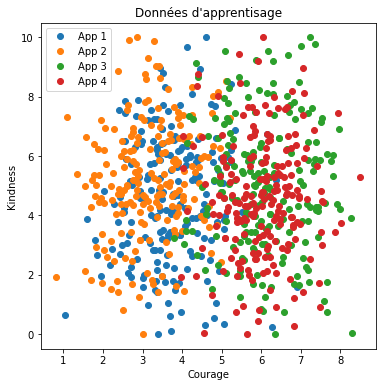

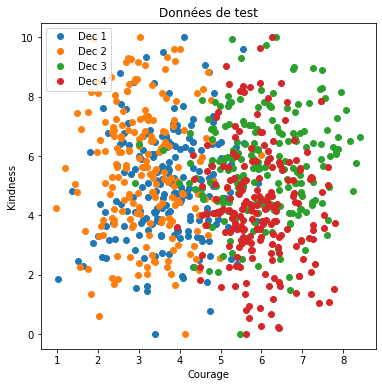

In [26]:
# A compléter
labels_app, data_labels_app = utils.split_data(data_app,"House")
labels_dec, data_labels_dec = utils.split_data(data_dec,"House")

# Affichage des données app en fonction des variables Courage et Kindness
app_labels = [f"App {l}" for l in labels_app]
app_x = [d['Courage'] for d in data_labels_app]
app_y = [d['Kindness'] for d in data_labels_app]
utils.plot_2_var(app_labels,app_x,app_y,"Données d'apprentisage",var1='Courage',var2='Kindness')

# Affichage des données dec en fonction des variables Courage et Kindness
dec_labels = [f"Dec {l}" for l in labels_dec]
dec_x = [d['Courage'] for d in data_labels_dec]
dec_y = [d['Kindness'] for d in data_labels_dec]
utils.plot_2_var(dec_labels,dec_x,dec_y,"Données de test",var1='Courage',var2='Kindness')

**Comment sont répartis les échantillons ?**

**_Réponse :_**

**4)** Affichez maintenant les données app et dec sur un même graphique, toujours en fonction des variables Courage et Kindness. Veuillez à bien différencier les points App des points Dec en légende.

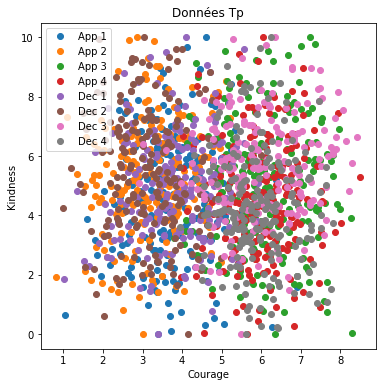

In [27]:
# A compléter
# Affichage des données app et dec sur un même graphique en fonction des variables Courage et Kindness
all_labels = app_labels+dec_labels
all_x = app_x+dec_x
all_y = app_y+dec_y
utils.plot_2_var(all_labels,all_x,all_y,"Données Tp",var1='Courage',var2='Kindness')

**Les données d'apprentissage et de décision ont-elles les mêmes répartitions ?**

**_Réponse :_**

**5)** Utilisez un classifieur par distance minimum euclidienne et un classifieur par distance de Mahalanobis minimum (TP2), entrainez les sur vos données et évaluez-les, et stockez les matrices de confusion calculées dans un objet : on s'en servira pour la suite. Vous utiliserez uniquement les variables Courage et Kindness. Complétez ensuite le tableau avec vos résultats obtenus.

In [28]:
# A compléter
# Création des classifieurs distance minimum euclidiennes et Mahalanobis
classes = np.unique(data_app['House'])

CDE = utils.ClassifieurDistMin(classes)
CDM = utils.ClassifieurDistMahalanobis(classes)

# Apprentissage des classifieurs sur les données d'apprentissages (Courage et Kindness)
CDE.learning(data_app['Courage'],data_app['Kindness'],data_app['House'])
CDM.learning(data_app['Courage'],data_app['Kindness'],data_app['House'])

# Evaluation des classifieurs sur les données d'évaluation
CDE_results = CDE.test(data_dec['Courage'],data_dec['Kindness'],data_dec['House'])
CDM_results = CDM.test(data_dec['Courage'],data_dec['Kindness'],data_dec['House'])

# Récupération des matrices de confusion dans un objet commun
all_CM = {'CDE':CDE_results[2],
         'CDM':CDM_results[2]}

Top 1 :  0.58625
Top 2 :  0.90625
Matrice de confusion : 
   100  78  14   8
   70 124   3   3
   12   8 126  54
   12   2  67 119
Top 1 :  0.56875
Top 2 :  0.91625
Matrice de confusion : 
    99  78  18   5
   59 132   7   2
   20   3 152  25
   15   0 113  72


| Classifieur | Top1 | Top2 |
|:-----------:|:----:|:----:|
| Distance Euclidienne minimum | | |
| Distance Mahalanobis minimum | | |

**6)** Utilisez maintenant 2 classifieurs de Parzen (un avec noyau uniforme, et un avec noyau gaussien). Commencez par déterminer le paramètre h optimal via une cross validation à 3 dossiers. Ensuite, avec ces 2 paramètres trouvés, créez une instance pour chaque model avec le paramètre optimal correspondant, entraînez vos classifieurs et évaluez-les ensuite sur les données d'évaluation. Comme précédemment, récupérez les matrices de confusion, et complétez le tableau suivant

In [29]:
# A compléter
# Cross validation à 3 dossiers pour déterminer les paramètres h optimaux pour un classifieur de Parzen avec noyau uniforme et noyau gaussien
h_parzen = {'uniforme':None,'gaussien':None}
for noyau in ['uniforme','gaussien']:
    h_results = utils.cross_validation_parzen(3,data_app['Courage'],data_app['Kindness'],data_app['House'],utils.Parzen,classes,noyau,0,10,1)
    h_max = max([p[1] for p in h_results])
    h_opti = [h for h in h_results if h[1]==h_max][0][0]
    h_results = utils.cross_validation_parzen(3,data_app['Courage'],data_app['Kindness'],data_app['House'],utils.Parzen,classes,noyau,int(h_opti-1),int(h_opti+1),0.1)
    h_max = max([p[1] for p in h_results])
    h_opti = [h for h in h_results if h[1]==h_max][0][0]
    h_parzen[noyau]=h_opti
print(h_parzen)

# Création des classifieurs de Parzen avec noyau uniforme et noyau gaussien
PU = utils.Parzen(classes,'uniforme',h_parzen['uniforme'])
PG = utils.Parzen(classes,'gaussien',h_parzen['gaussien'])

# Apprentissage des classifieurs sur les données d'apprentissages (Courage et Kindness)
PU.learning(data_app['Courage'],data_app['Kindness'],data_app['House'])
PG.learning(data_app['Courage'],data_app['Kindness'],data_app['House'])

# Evaluation des classifieurs sur les données d'évaluation
PU_results = PU.test(data_dec['Courage'],data_dec['Kindness'],data_dec['House'])
PG_results = PG.test(data_dec['Courage'],data_dec['Kindness'],data_dec['House'])

# Récupération des matrices de confusion dans un objet commun
all_CM['PU'] = PU_results[2]
all_CM['PG'] = PG_results[2]

100% (10 of 10) |########################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (20 of 20) |########################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (10 of 10) |########################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (20 of 20) |########################| Elapsed Time: 0:00:53 Time:  0:00:53


{'uniforme': 2.4000000000000012, 'gaussien': 1.8000000000000007}
Top 1 :  0.5525
Top 2 :  0.90875
Matrice de confusion : 
    80  94  14  12   0
   52 137   5   6   0
   18   5  68 109   0
   15   0  28 157   0
Top 1 :  0.55
Top 2 :  0.90375
Matrice de confusion : 
    76 102   6  16   0
   52 141   0   7   0
   12  12  61 115   0
   12   2  24 162   0


| Classifieur | h optimal | Top1 | Top2 |
|:-----------:|:--------:|:----:|:----:|
| Parzen avec noyau uniforme | | | |
| Parzen avec noyau gaussien | | | |

**7)** Même principe, mais avec 2 classifieurs KPPV (avec vote majoritaire et vote unanime). Utilisez une cross validation à 3 dossiers pour trouver le k optimal, créez les classifieurs, effectuez l'apprentissage sur vos données d'entraînement puis évaluez-les sur les données d'évaluations. Récupérez ensuite les matrices de confusion et complétez le tableau suivant.

In [7]:
# A compléter
# Cross validation à 3 dossiers pour déterminer les paramètres k optimaux pour un classifieur KPPV avec vote majoritaire et vote unanime
k_KPPV = {'majoritaire':None,'unanime':None}
for vote in ['majoritaire','unanime']:
    k_results = utils.cross_validation_KPPV(3,data_app['Courage'],data_app['Kindness'],data_app['House'],utils.KPPV,classes,vote,2,10,1)
    k_max = max([p[1] for p in k_results])
    k_opti = [k for k in k_results if k[1]==k_max][0][0]
    k_KPPV[vote]=k_opti
print(k_KPPV)

# Création des classifieurs KPPV avec vote majoritaire et vote unanime
KM = utils.KPPV(classes,'majoritaire',k_KPPV['majoritaire'])
KU = utils.KPPV(classes,'unanime',k_KPPV['unanime'])

# Apprentissage des classifieurs sur les données d'apprentissages (Courage et Kindness)
KM.learning(data_app['Courage'],data_app['Kindness'],data_app['House'])
KU.learning(data_app['Courage'],data_app['Kindness'],data_app['House'])

# Evaluation des classifieurs sur les données d'évaluation
KM_results = KM.test(data_dec['Courage'],data_dec['Kindness'],data_dec['House'])
KU_results = KU.test(data_dec['Courage'],data_dec['Kindness'],data_dec['House'])

# Récupération des matrices de confusion dans un objet commun
all_CM['KM'] = KM_results[2]
all_CM['KU'] = KU_results[2]

100% (8 of 8) |##########################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (8 of 8) |##########################| Elapsed Time: 0:00:10 Time:  0:00:10


{'majoritaire': 7, 'unanime': 2}
Top 1 :  0.5075
Top 2 :  0.87875
Matrice de confusion : 
    80  17  11  92
   13  88  88  11
   12  72 115   1
   69   5   3 123
Top 1 :  0.23875
Top 2 :  0.23875
Matrice de confusion : 
    31   7   4  50 108
    5  46  43   3 103
    2  27  51   1 119
   29   1   4  63 103


| Classifieur | k optimal | Top1 | Top2 |
|:-----------:|:--------:|:----:|:----:|
| KPPV avec vote majoritaire | | | |
| KPPV avec vote unanime | | | |

**Les résultats obtenus pour chacun des classifieurs sont-ils satisfaisants ? Il y'a-t-il un classifieur à privilégier par rapport aux autres ?**

**_Réponse :_**

**8)** Visualisez maintenant toutes les matrices de confusion obtenues avec chaque classifieur.

In [8]:
# A compléter
# Visualisation de toutes les matrices de confusion obtenues
...

Ellipsis

**Que remarquez-vous sur chacune des matrices ? Qu'est-ce que cela veut dire concrètement ? En conclure sur les problèmes de prédiction des modèles sur ce jeu de données**

**_Réponse :_**

**A l'aide des échantillons affichés graphiquement à la question 3, quelle variable parmi celles utilisées pose un soucis ? Et à l'inverse, quelle variable paraît utile pour la classification ?**

**_Réponse :_**

---

## Partie 2 : 

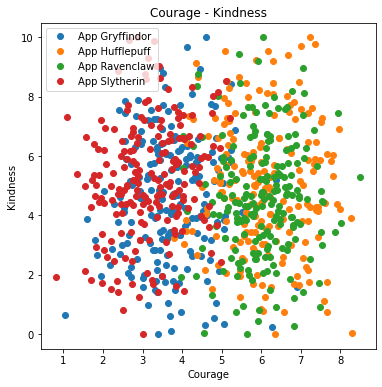

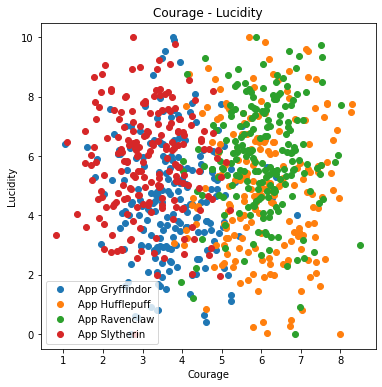

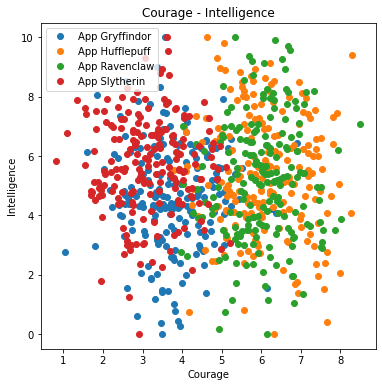

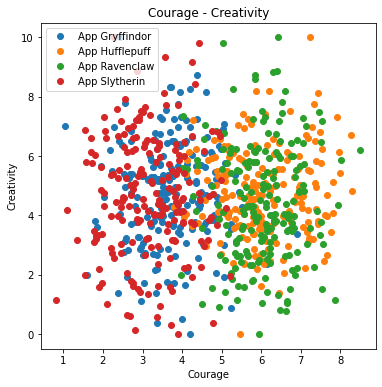

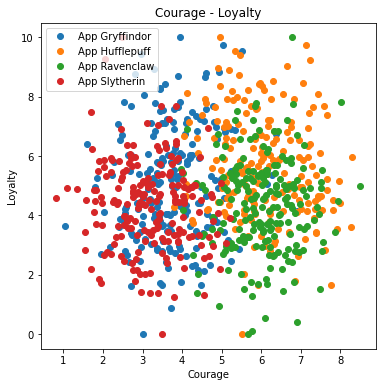

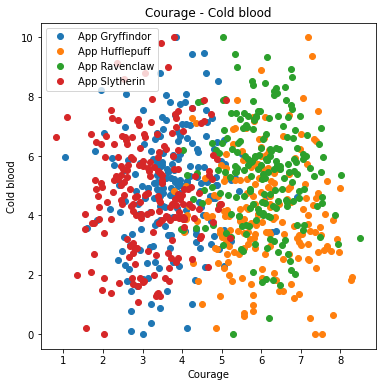

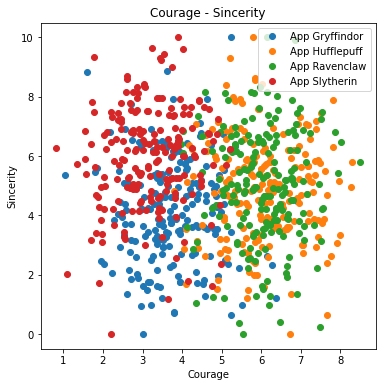

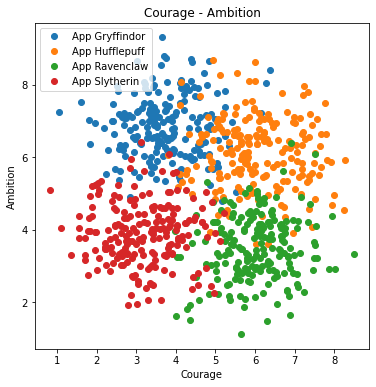

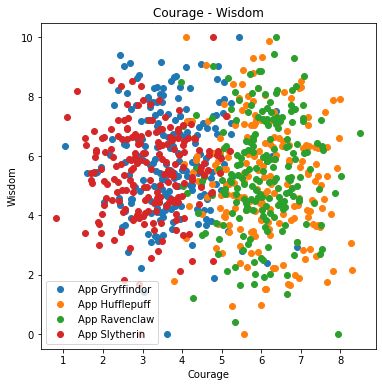

In [8]:
vars = [col for col in data_app.columns if col not in ['House','Courage']]
for var in vars:
    app_x = [d['Courage'] for d in data_labels_app]
    app_y = [d[var] for d in data_labels_app]
    utils.plot_2_var(app_labels,app_x,app_y,'{} - {}'.format('Courage',var),var1='Courage',var2=var)